# Statistics

## 1.1 Sales for the past week was the following amounts: [3505, 2400, 3027, 2798, 3700, 3250, 2689]. Without using library functions, what is the mean, variance, and standard deviation of of sales from last week? (for extra bonus points, write your own function that can calculate these two values for any sized list)

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
def calc(lst):
    mean = sum(lst) / len(lst)    
    var_lst = [(num-mean)**2 for num in lst]
    variance = sum(var_lst) / len(lst)
    std = np.sqrt(variance)
    
    return("Mean: {}".format(mean), "Variance: {}".format(variance), "Standard Deviation: {}".format(std))

In [31]:
print(calc([3505, 2400, 3027, 2798, 3700, 3250, 2689]))

('Mean: 3052.714285714286', 'Variance: 183761.06122448976', 'Standard Deviation: 428.67360686714756')


## 1.2 Find the covariance between last week's sales numbers and the number of customers that entered the store last week: [127, 80, 105, 92, 120, 115, 93] (you may use library functions for calculating the covariance since we didn't specifically talk about its formula)

In [0]:
# Covariance from scratch
x = [3505, 2400, 3027, 2798, 3700, 3250, 2689]
y = [127, 80, 105, 92, 120, 115, 93]

def covariance(x, y):
    x_mean = sum(x) / len(x)
    y_mean = sum(y) / len(y)
    
    x_change = np.array([(num-x_mean) for num in x])
    y_change = np.array([(num-y_mean) for num in y])
        
    covariance = sum(x_change * y_change) / (len(x)-1)
    return covariance

In [32]:
cov = covariance(x,y)
print("Covariance from scratch: {}".format(cov))

Covariance from scratch: 7604.357142857142


In [28]:
# When a and b are 1-dimensional sequences, numpy.cov(a,b)[0][1]
# is equivalent to your cov(a,b)
print("Covariance using numpy library: {}".format(np.cov(x, y)[0][1]))

Covariance using numpy library: 7604.357142857142


## 1.3 Find the standard deviation of customers who entered the store last week. Then, use the standard deviations of both sales and customers to standardize the covariance to find the correlation coefficient that summarizes the relationship between sales and customers. (You may use library functions to check your work.)

In [0]:
def cov_coef(x, y):
    x_mean = sum(x) / len(x)
    y_mean = sum(y) / len(y)
    
    x_change = np.array([((num-x_mean) / np.std(x)) for num in x]) 
    y_change = np.array([((num-y_mean) / np.std(y)) for num in y])
        
    r = sum(x_change * y_change) / len(x)
    return r

In [80]:
cov_coef(x, y)

0.962833977814891

In [41]:
np.corrcoef(x,y)[0][1]

0.9628339778148909

## 1.4 Use pandas to import a cleaned version of the titanic dataset from the following link: [Titanic Dataset](https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv)

## Calculate the variance-covariance matrix and correlation matrix for the titanic dataset's numeric columns. (you can encode some of the categorical variables and include them as a stretch goal if you finish early)

In [0]:
titanic = pd.read_csv('https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv')

In [53]:
titanic.shape

(1310, 16)

In [54]:
titanic.isnull().sum()

Unnamed: 0             0
pclass                 1
survived               1
name                   1
sex                    1
age                    0
sibsp                  1
parch                  1
ticket                 1
fare                   2
cabin               1015
embarked               0
boat                 824
body                1189
home.dest            565
has_cabin_number       0
dtype: int64

In [0]:
titanic.drop(['cabin', 'boat', 'body', 'home.dest'], axis=1, inplace=True)

In [0]:
titanic.dropna(inplace=True)

In [57]:
titanic.isnull().sum().sum()

0

In [58]:
titanic.head()

,Unnamed: 0,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked,has_cabin_number
0,1,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,S,1
1,2,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,S,1
2,3,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,S,1
3,4,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,S,1
4,5,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,S,1


In [82]:
titanic.describe()

,Unnamed: 0,pclass,survived,age,sibsp,parch,fare,has_cabin_number
count,1308.000000,1308.000000,1308.000000,1308.000000,1308.000000,1308.000000,1308.000000,1308.000000
mean,654.563456,2.294343,0.382263,29.857726,0.499235,0.385321,33.295479,0.225535
std,377.834424,0.837929,0.486126,12.860247,1.041965,0.865826,51.758668,0.418094
min,1.000000,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,0.000000
25%,327.750000,2.000000,0.000000,22.000000,0.000000,0.000000,7.895800,0.000000
50%,654.500000,3.000000,0.000000,29.881135,0.000000,0.000000,14.454200,0.000000
75%,981.250000,3.000000,1.000000,35.000000,1.000000,0.000000,31.275000,0.000000
max,1309.000000,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,1.000000


In [84]:
np.cov(titanic.age, titanic.fare)

array([[ 165.38595695,  114.41661308],
       [ 114.41661308, 2678.95973789]])

In [85]:
np.corrcoef(titanic.age, titanic.fare)

array([[1.       , 0.1718924],
       [0.1718924, 1.       ]])

# Orthogonality

## 2.1 Plot two vectors that are orthogonal to each other. What is a synonym for orthogonal?

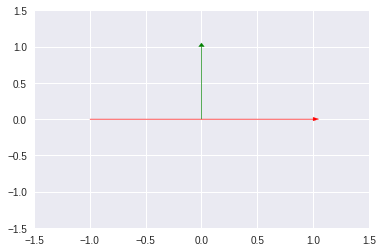

In [100]:
plt.arrow(-1,0,2,0, head_width=0.05, head_length=.05, color='red')
plt.arrow(0,0,0,1, head_width=0.05, head_length=.05, color='green')

plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.show()

## 2.2 Are the following vectors orthogonal? Why or why not?

\begin{align}
a = \begin{bmatrix} -5 \\ 3 \\ 7 \end{bmatrix}
\qquad
b = \begin{bmatrix} 6 \\ -8 \\ 2 \end{bmatrix}
\end{align}

Not Orthogonal. Their dot product is not zero (0)

In [101]:
a = np.array([-5, 3, 7])
b = np.array([6, -8, 2])
np.dot(a, b)

-40

## 2.3 Compute the following values: What do these quantities have in common?

## What is $||c||^2$? 

## What is $c \cdot c$? 

## What is $c^{T}c$?

\begin{align}
c = \begin{bmatrix} 2 & -15 & 6 & 20 \end{bmatrix}
\end{align}

In [103]:
c = np.array([2, -15, 6, 20])
(np.linalg.norm(c))**2

665.0

In [104]:
np.dot(c, c)

665

In [105]:
np.dot(c.T, c)

665

# Unit Vectors

## 3.1 Using Latex, write the following vectors as a linear combination of scalars and unit vectors:

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix}
\qquad
e = \begin{bmatrix} 2 \\ 11 \\ -8  \end{bmatrix}
\end{align}

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix} = 7\begin{bmatrix} 1 \\ 0 \end{bmatrix} + 13\begin{bmatrix} 0 \\ 1 \end{bmatrix} = 7\hat{i} + 12\hat{j}
\end{align}

\begin{align}
e = \begin{bmatrix} 2 \\ 11 \\ -8 \end{bmatrix} = 2\begin{bmatrix} 1 \\ 0 \\ 0 \end{bmatrix} + 11\begin{bmatrix} 0 \\ 1 \\ 0 \end{bmatrix} -8\begin{bmatrix} 0 \\ 0 \\ 1 \end{bmatrix} = 2\hat{i} + 11\hat{j} -8\hat{k}
\end{align}

## 3.2 Turn vector $f$ into a unit vector:

\begin{align}
f = \begin{bmatrix} 4 & 12 & 11 & 9 & 2 \end{bmatrix}
\end{align}

In [112]:
f = np.array([4, 12, 11, 9, 2])
f_norm = np.linalg.norm(f)
f_unit = np.dot((1/f_norm),f)
print("f as unit vector: {}".format(f_unit))

f as unit vector: [0.20908335 0.62725005 0.57497921 0.47043754 0.10454167]


# Linear Independence / Dependence 

## 4.1 Plot two vectors that are linearly dependent and two vectors that are linearly independent (bonus points if done in $\mathbb{R}^3$).

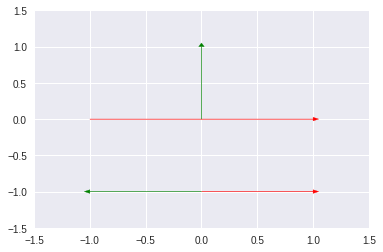

In [123]:
plt.arrow(-1,0,2,0, head_width=0.05, head_length=.05, color='red')
plt.arrow(0,0,0,1, head_width=0.05, head_length=.05, color='green')

plt.arrow(0,-1,1,0, head_width=0.05, head_length=.05, color='red')
plt.arrow(0,-1,-1,0, head_width=0.05, head_length=.05, color='green')

plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.show()

# Span

## 5.1 What is the span of the following vectors?

\begin{align}
g = \begin{bmatrix} 1 & 2 \end{bmatrix}
\qquad
h = \begin{bmatrix} 4 & 8 \end{bmatrix}
\end{align}

g*4 = h 

So, one is a linear combination of the other. This means they are linearly dependent - so they span 1 dimension

## 5.2 What is the span of $\{l, m, n\}$?

\begin{align}
l = \begin{bmatrix} 1 & 2 & 3 \end{bmatrix}
\qquad
m = \begin{bmatrix} -1 & 0 & 7 \end{bmatrix}
\qquad
n = \begin{bmatrix} 4 & 8  & 2\end{bmatrix}
\end{align}

These three vectors are linearly independent. None of them are a linear combination of another.

The span R3.

# Basis

## 6.1 Graph two vectors that form a basis for $\mathbb{R}^2$



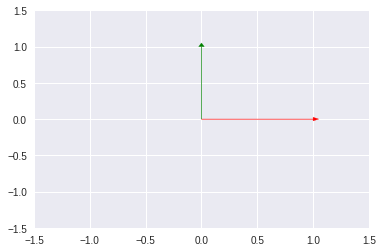

In [128]:
plt.arrow(0,0,1,0, head_width=0.05, head_length=.05, color='red')
plt.arrow(0,0,0,1, head_width=0.05, head_length=.05, color='green')

plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.show()

## 6.2 What does it mean to form a basis?

Set of vectors that are linearly independent, span the vector space, and their unit length is 1.

# Rank

## 7.1 What is the Rank of P?

\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
 -1 & 0 & 7 \\
4 & 8  & 2
\end{bmatrix}
\end{align}

In [129]:
P = [[1, 2, 3],
     [-1, 0, 7],
     [4, 8, 2]]
np.linalg.matrix_rank(P)

3

## 7.2 What does the rank of a matrix tell us?

Rank is the number of dimensions of the vector space generated by the columns of a matrix

# Linear Projections

## 8.1 Line $L$ is formed by all of the vectors that can be created by scaling vector $v$ 
\begin{align}
v = \begin{bmatrix} 1 & 3 \end{bmatrix}
\end{align}

\begin{align}
w = \begin{bmatrix} -1 & 2 \end{bmatrix}
\end{align}

## find $proj_{L}(w)$

## graph your projected vector to check your work (make sure your axis are square/even)

In [151]:
v = np.array([1, 3])
w = np.array([-1, 2])

projLw = np.dot(w,v)*v / np.dot(v,v)
projLw

array([0.5, 1.5])

In [158]:
np.sqrt(np.sqrt(1.5 ** 2 + 4.5 ** 2) + np.sqrt(5))

2.641871395006267

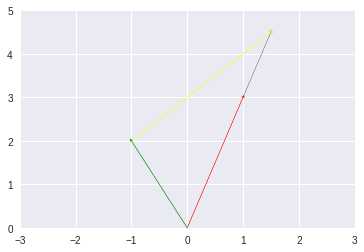

In [161]:
plt.arrow(0,0,1,3, head_width=0.05, head_length=.05, color='red')
plt.arrow(0,0,-1,2, head_width=0.05, head_length=.05, color='green')
plt.arrow(1,3, .5, 1.5, head_width=0.05, head_length=.05, color='gray')
plt.arrow(-1,2, 2.5, 2.5, head_width=0.05, head_length=.05, color='yellow')

plt.xlim(-3, 3)
plt.ylim(0, 5)
plt.show()

# Stretch Goal

## For vectors that begin at the origin, the coordinates of where the vector ends can be interpreted as regular data points. (See 3Blue1Brown videos about Spans, Basis, etc.)

## Write a function that can calculate the linear projection of each point (x,y) (vector) onto the line y=x. run the function and plot the original points in blue and the new projected points on the line y=x in red. 

## For extra points plot the orthogonal vectors as a dashed line from the original blue points to the projected red points.

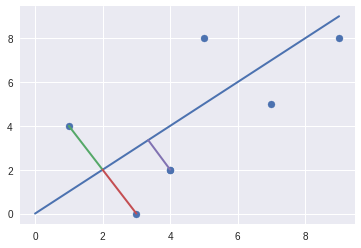

In [211]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating a dataframe for you to work with -Feel free to not use the dataframe if you don't want to.
x_values = [1, 4, 7, 3, 9, 4, 5]
y_values = [4, 2, 5, 0, 8, 2, 8]

data = {"x": x_values, "y": y_values}

df = pd.DataFrame(data)

df.head()

plt.scatter(df.x, df.y)

plt.plot([0, 9], [0, 9], lw=2)
plt.plot([1, 2], [4, 2], lw=2)
plt.plot([3, 2], [0, 2], lw=2)
plt.plot([4, 3.35], [2, 3.35], lw=2)
plt.show()